- 需求：
    - 1. 星巴克的数量在美国和中国哪个多？
    - 2. 中国各省份星巴克的数量情况

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [54]:
# 读取Starbucks数据
data = pd.read_csv("./data/StarBucks/directory.csv")

In [60]:
# 任务一：星巴克的数量在美国和中国哪个多？（美国US、中国CN）

# 1. 统计星巴克在美国与中国的数量
US_count = data.groupby(by="Country")["Brand"].count().loc["US"]
CN_count = data.query("Country == 'CN'").shape[0]
# 2. 进行比较
if US_count > CN_count:
    print("美国多")
else:
    print("中国多")

美国多


In [167]:
# 任务二：中国各省份星巴克的数量情况

province = data.set_index("Country").loc["CN"].set_index("State/Province")
province["Count"] = province.groupby(by="State/Province")["Brand"].count()
province_count = DataFrame(province["Count"].drop_duplicates())
province_count

,Count
State/Province,
11,236
12,58
13,24
14,8
21,57
22,13
23,16
31,551
32,354


- 需求
    - 问题1:我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取?
    - 问题2:对于这一组电影数据，如果我们想rating， runtime的分 布情况，应该如何呈现数据?
    - 问题3:对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据?

In [11]:
# 读取数据
data = pd.read_csv("./data/IMDB-Movie-Data.csv")

In [49]:
# 任务一：电影数据中评分的平均分，导演的人数等信息
movieAverage = data["Rating"].mean()
directorCount = data["Director"].unique().size
directorCount

644

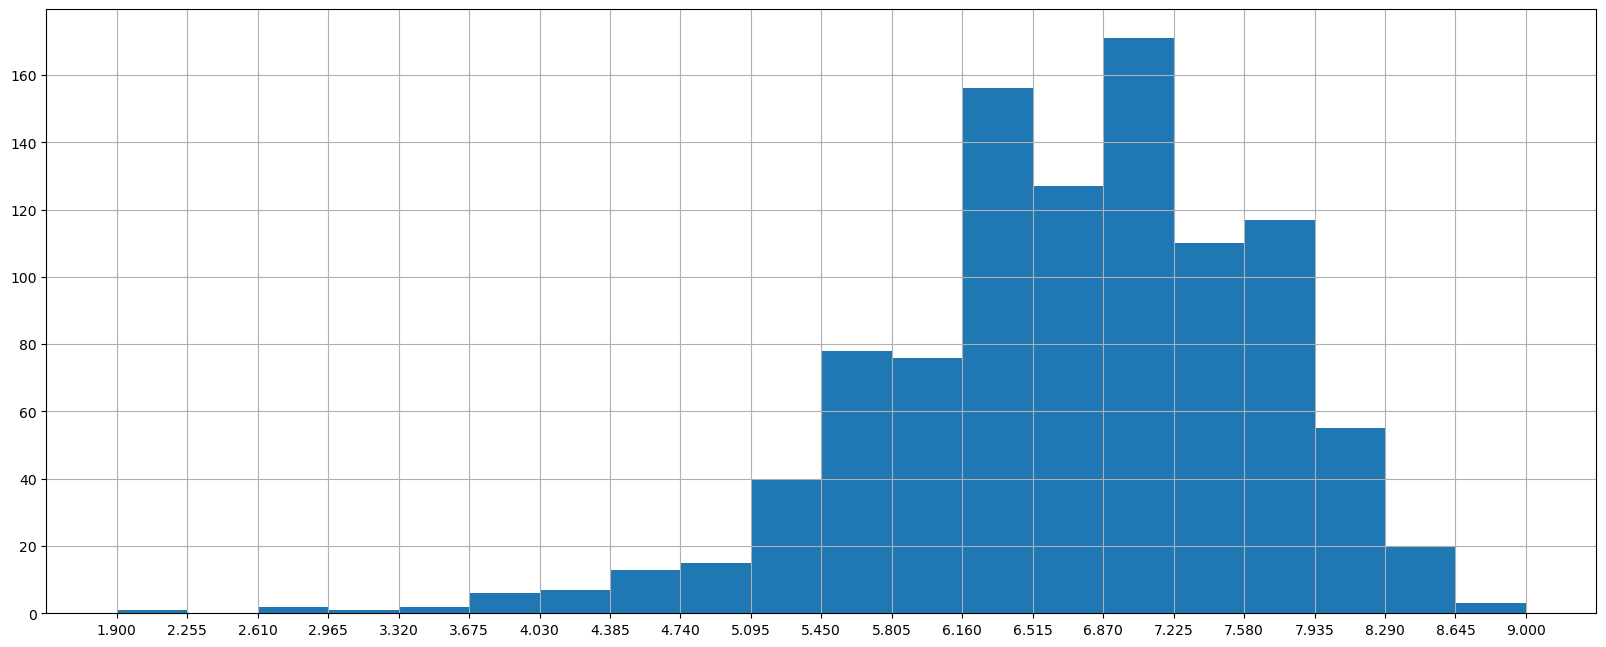

In [62]:
# 任务二：rating的分布情况

# 绘制画布
plt.figure(figsize=(20,8),dpi=100)

# 进行画图
plt.hist(data["Rating"].values,bins=20)

# 修改x轴
min_ = data["Rating"].min()
max_ = data["Rating"].max()
x = np.linspace(min_,max_,21)
plt.xticks(x)

# 绘制网格
plt.grid()

# 展示
plt.show()

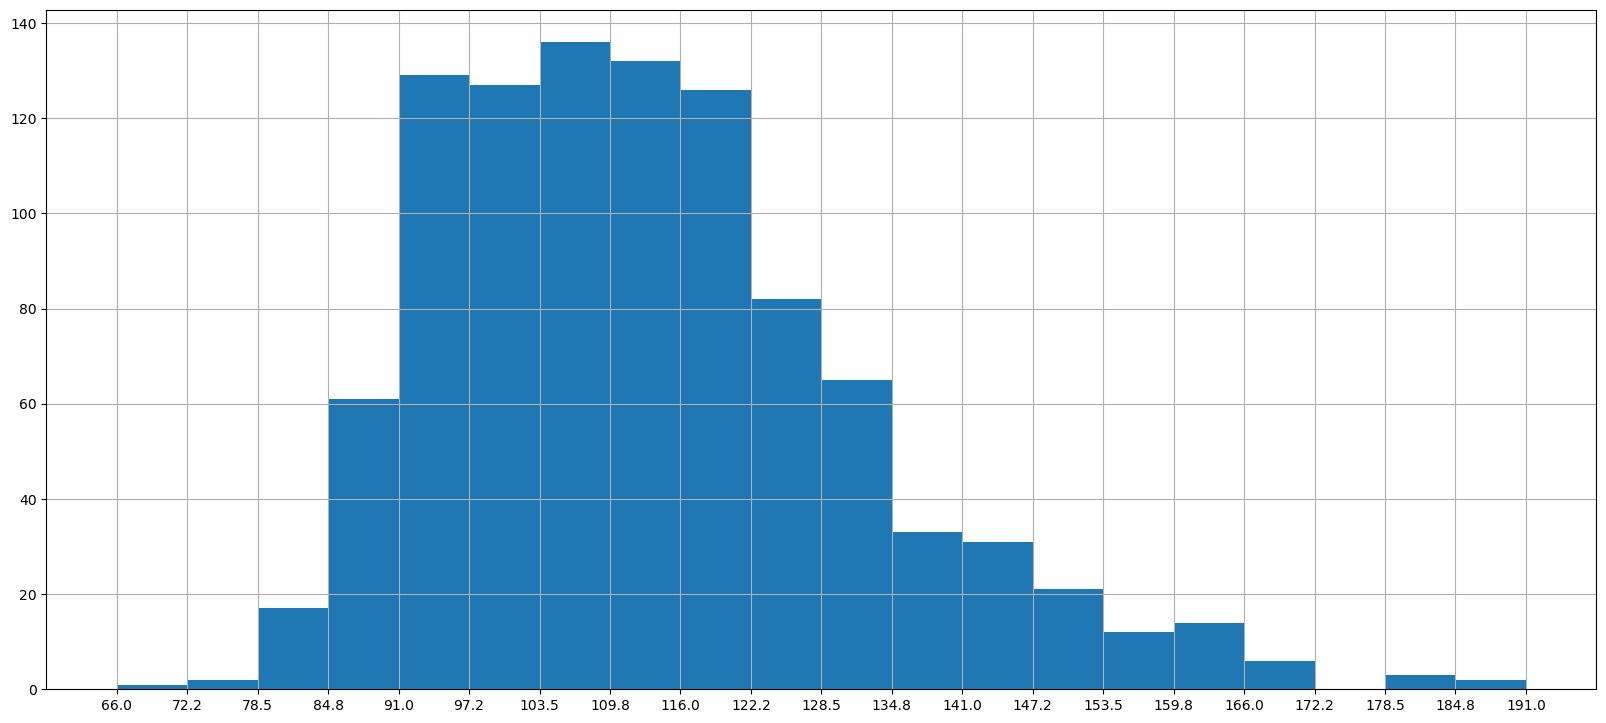

In [75]:
# 任务二：runtime的分布情况

# 绘制画布
plt.figure(figsize=(20,9),dpi=100)

# 绘制图像
plt.hist(data["Runtime (Minutes)"].values,bins=20)

# 修改x轴
min_ = data["Runtime (Minutes)"].min()
max_ = data["Runtime (Minutes)"].max()
x = np.linspace(min_,max_,21)
plt.xticks(x)

# 绘制网格
plt.grid()

# 展示
plt.show()


In [118]:
# 任务三：统计电影分类(genre)的情况

# 进行电影分类
temp = [i.split(",") for i in data["Genre"]]
genre = [j for i in temp for j in i ]

# 进行去重
genre = DataFrame(Series(np.array(genre)).unique(),columns=["movieName"])
genre = genre.set_index("movieName")

# 对genre增加Count列
genre["count"] = 0

# 进行遍历
for names in temp:
    for name in names:
        genre.loc[name,"count"] = genre.loc[name,"count"] + 1



,count
movieName,
Action,303
Adventure,259
Sci-Fi,120
Mystery,106
Horror,119
Thriller,195
Animation,49
Comedy,279
Family,51
